In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [3]:
import numpy as np
from qiskit.extensions import UnitaryGate

In [4]:
qc = QuantumCircuit(2,2)

matrix = [[0.5,(np.sqrt(3)/2)],
          [(-np.sqrt(3))/2,0.5]]
gate = UnitaryGate(matrix)
qc.append(gate,[0])
qc.barrier()


In [5]:
from math import pi
qc.x(0)
qc.cry((pi/2),0,1)
qc.x(0)
qc.cry((pi/2),0,1)
qc.barrier()

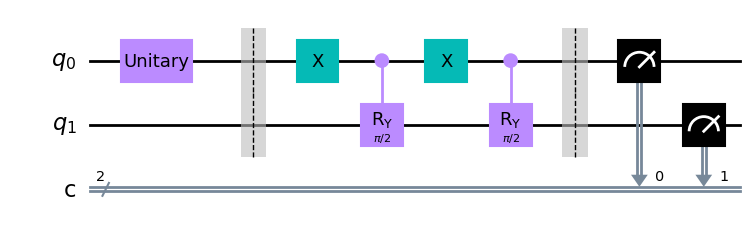

In [6]:

import qiskit.quantum_info as qi

cu = qi.Operator([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]])


qc.measure([0,1],[0,1])
qc.draw("mpl")


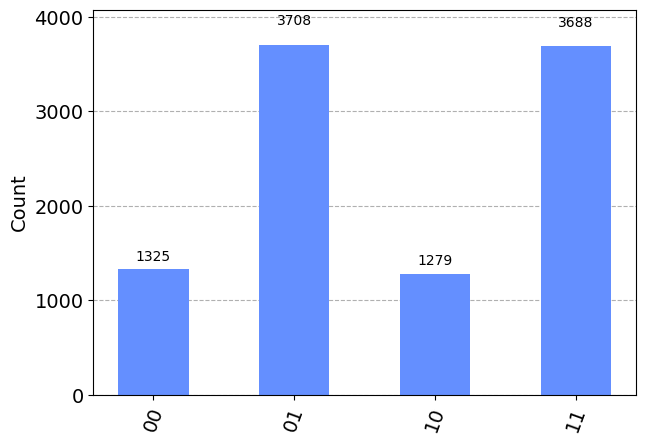

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 10000)

results = job.result()
plot_histogram(results.get_counts(qc))

In [8]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

/tmp/ipykernel_338/2428515937.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibmq_quito


In [9]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


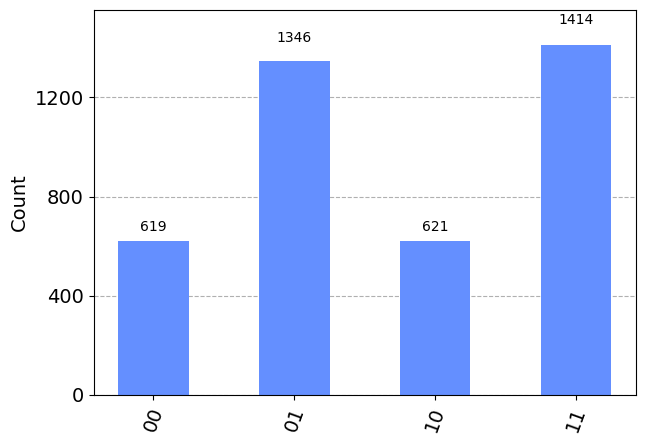

In [10]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))